# Unsupervised Learning

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

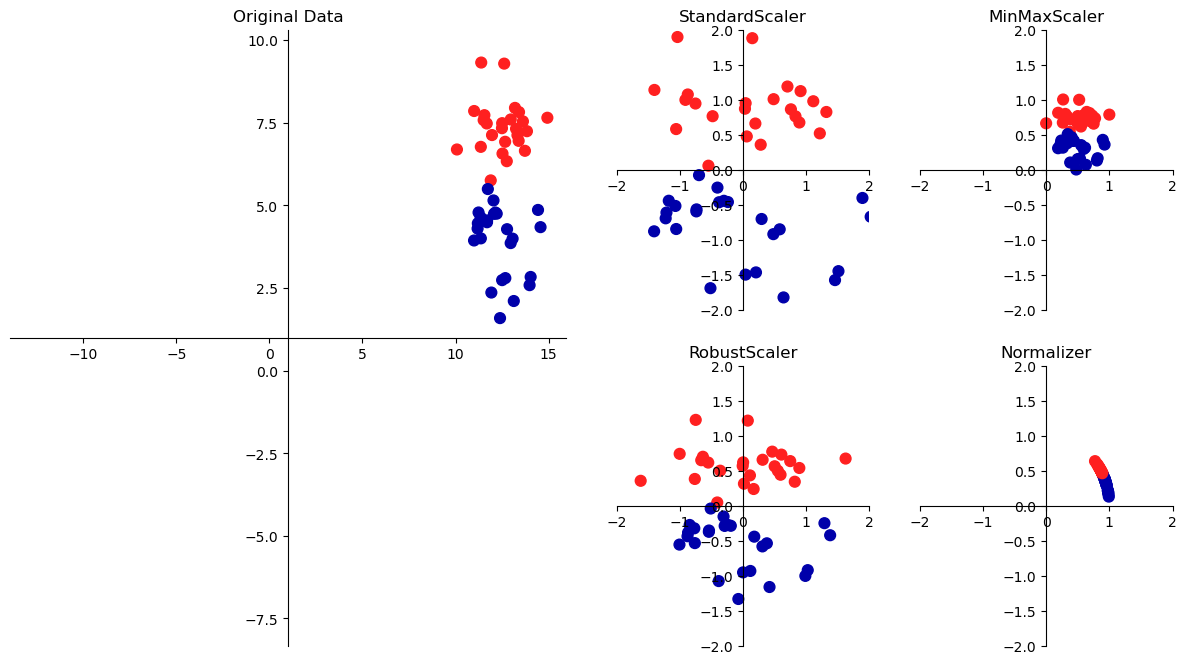

In [4]:
mglearn.plots.plot_scaling()

There are four data transformations:

- StandardScaler: this process changes data into a form that have mean of 0 and variance of 1.
- RobustScaler: this process is similar to the StandardScaler but it uses median and quartiles instead of mean and variance. Also it ignores outliers.
- MinMaxScaler: this process put all data between 0 and 1
- Normalizer: this process scales data such that the feature vector has a Euclidean distance of 1.

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)

In [7]:
X_train.shape

(426, 30)

In [8]:
X_test.shape

(143, 30)

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [10]:
scaler.fit(X_train)

MinMaxScaler()

In [12]:
X_train_scaled = scaler.transform(X_train)

print(f'transformed shape: {X_train_scaled.shape}')
print(f'per-feature min. before scaling: \n{X_train.min(axis=0)}')
print(f'per-feature min. after scaling:\n {X_train_scaled.min(axis=0)}')

transformed shape: (426, 30)
per-feature min. before scaling: 
[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature min. after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [13]:
print(f'per-feature max. before scaling: \n {X_train.max(axis=0)}')
print(f'per-feature max. after scaling: \n {X_train_scaled.max(axis=0)}')

per-feature max. before scaling: 
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature max. after scaling: 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [14]:
X_test_scaled = scaler.transform(X_test)

print(f'per-feature min. after scaling: \n{X_test_scaled.min(axis=0)}')

per-feature min. after scaling: 
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]


In [15]:
from sklearn.datasets import make_blobs

In [16]:
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)

In [23]:
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

In [24]:
X_train.shape

(45, 2)

/var/folders/8h/0198_l7s2vj1nwsk_h331bc00000gn/T/ipykernel_42034/3859402588.py:3: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[0].scatter(X_train[:, 0], X_train[:, 1],
/var/folders/8h/0198_l7s2vj1nwsk_h331bc00000gn/T/ipykernel_42034/3859402588.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[0].scatter(X_test[:, 0], X_test[:, 1],
/var/folders/8h/0198_l7s2vj1nwsk_h331bc00000gn/T/ipykernel_42034/3859402588.py:19:

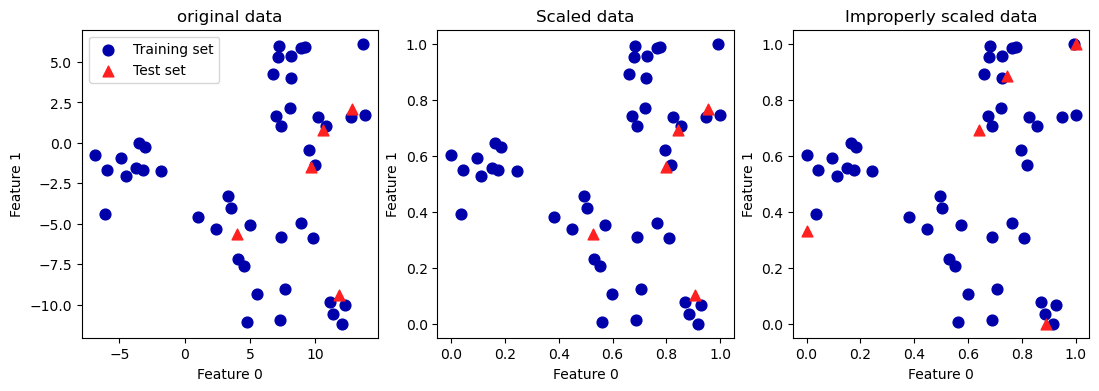

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(13, 4))

axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2(0),
                label='Training set',
                s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1],
                c=mglearn.cm2(1),
                label='Test set', marker='^',
                s=60)
axes[0].legend(loc='upper left')
axes[0].set_title('original data')

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0),
                label='Training set',
                s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1],
                c=mglearn.cm2(1),
                label='Test set',
                marker='^',
                s=60)
axes[1].set_title('Scaled data')

test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)


axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0),
                label='training set',
                s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                c=mglearn.cm2(1),
                marker='^',
                s=60)
axes[2].set_title('Improperly scaled data')

for ax in axes:
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')

Note: use the same scaler on the training data and test data!

In [36]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [37]:
svm = SVC(C=100)
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.9440559440559441

In [38]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
svm.fit(X_train_scaled, y_train)

SVC(C=100)

In [40]:
svm.score(X_test_scaled, y_test)

0.965034965034965

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
svm.fit(X_train_scaled, y_train)

svm.score(X_test_scaled, y_test)

0.958041958041958

## Dimensionality reduction, feature extraction, and manifold learning

### Principal component analysis (PCA)

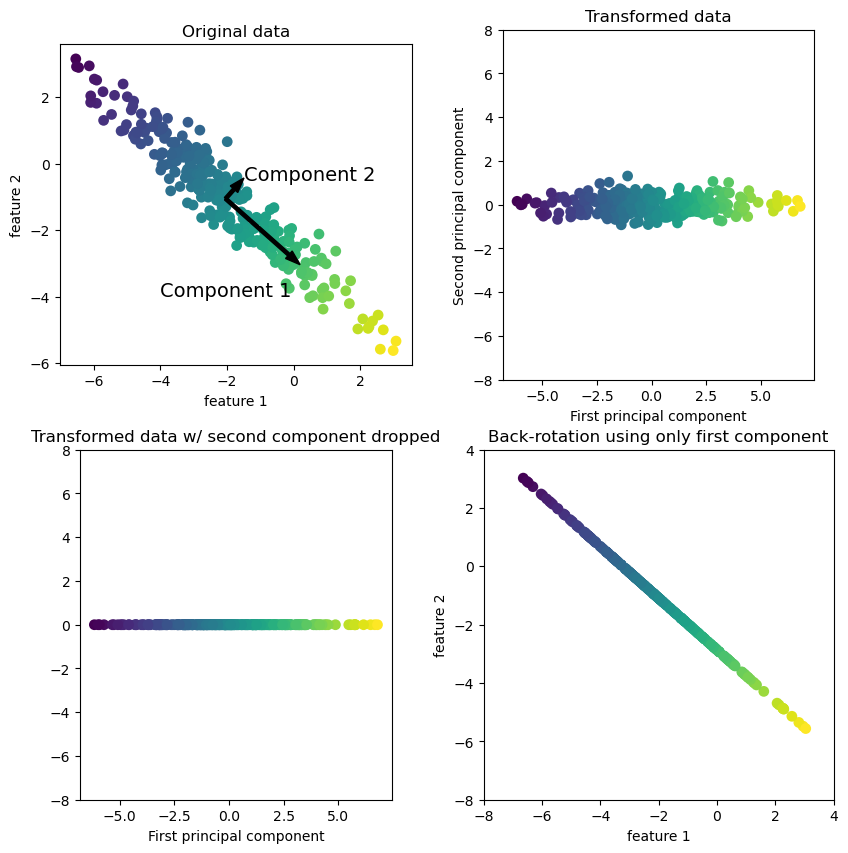

In [43]:
mglearn.plots.plot_pca_illustration()

One option to understand the training dataset is to plot the histogram for each variable.

- For regression problem, this could be a scatter plot.
- For classification problem, this could be a histogram. The purpose is to understand the significance of a feature in distinguishing the different classes. Some features won't be informative enough to separate one class from other classes, while other features could be ver informative.

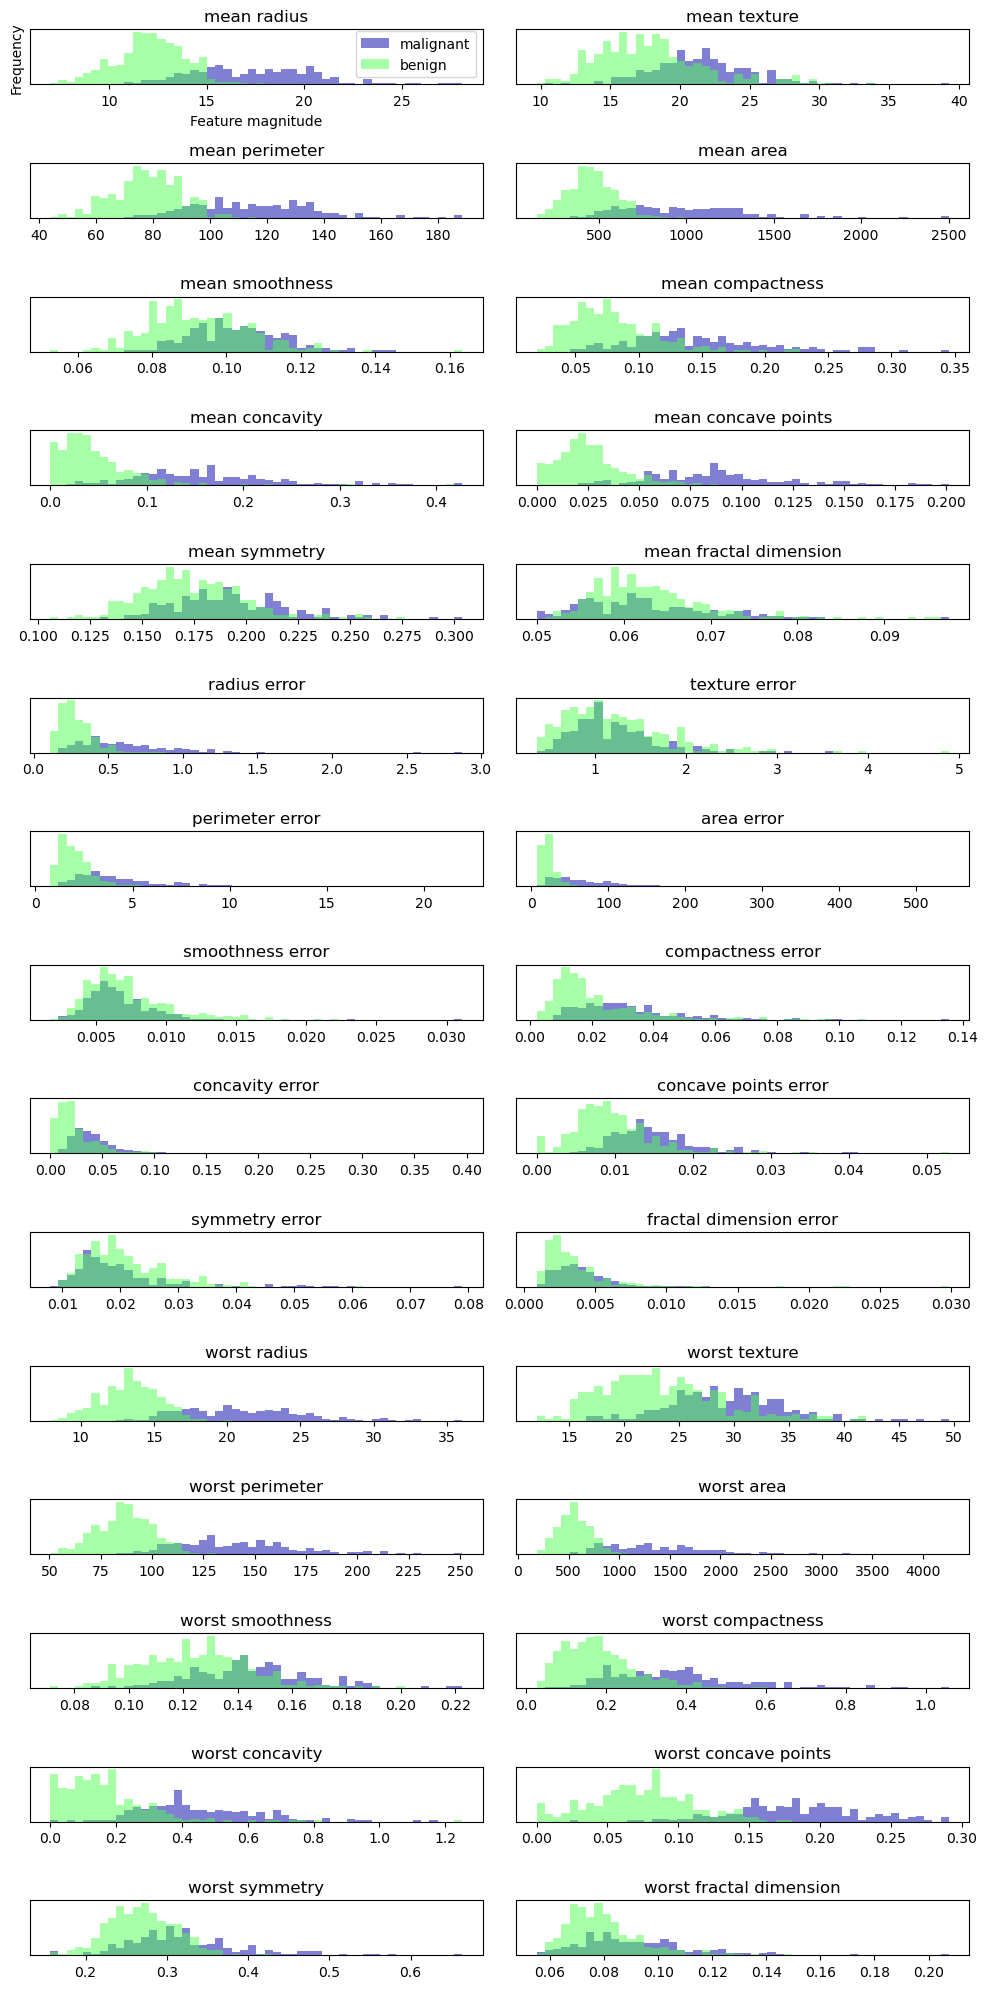

In [49]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel('Feature magnitude')
ax[0].set_ylabel('Frequency')
ax[0].legend(['malignant', 'benign'], loc='best')

fig.tight_layout()

In [50]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [51]:
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [52]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)

print(f'original shape: {X_scaled.shape}')
print(f'reduced shape: {X_pca.shape}')

original shape: (569, 30)
reduced shape: (569, 2)


Text(0, 0.5, 'Second principal component')

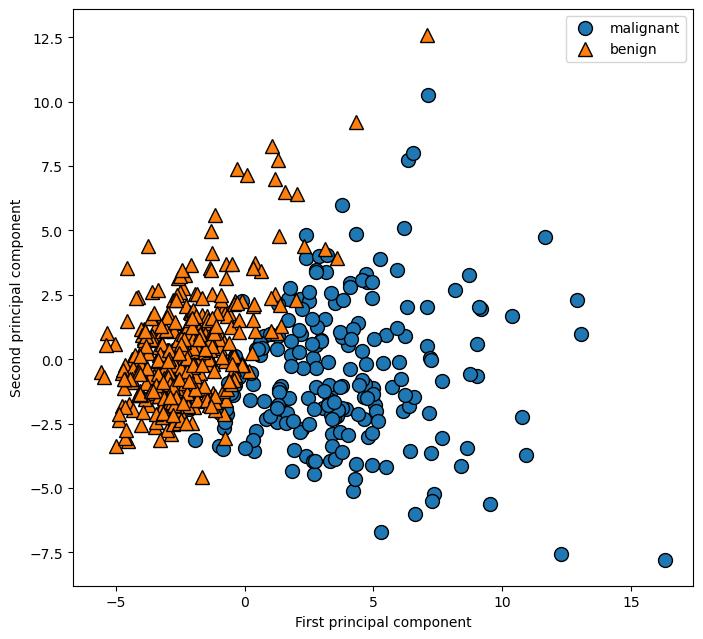

In [53]:
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:,1], cancer.target)
plt.legend(cancer.target_names, loc='best')
plt.gca().set_aspect('equal')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

In [54]:
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

In [58]:
image_shape = people.images[0].shape

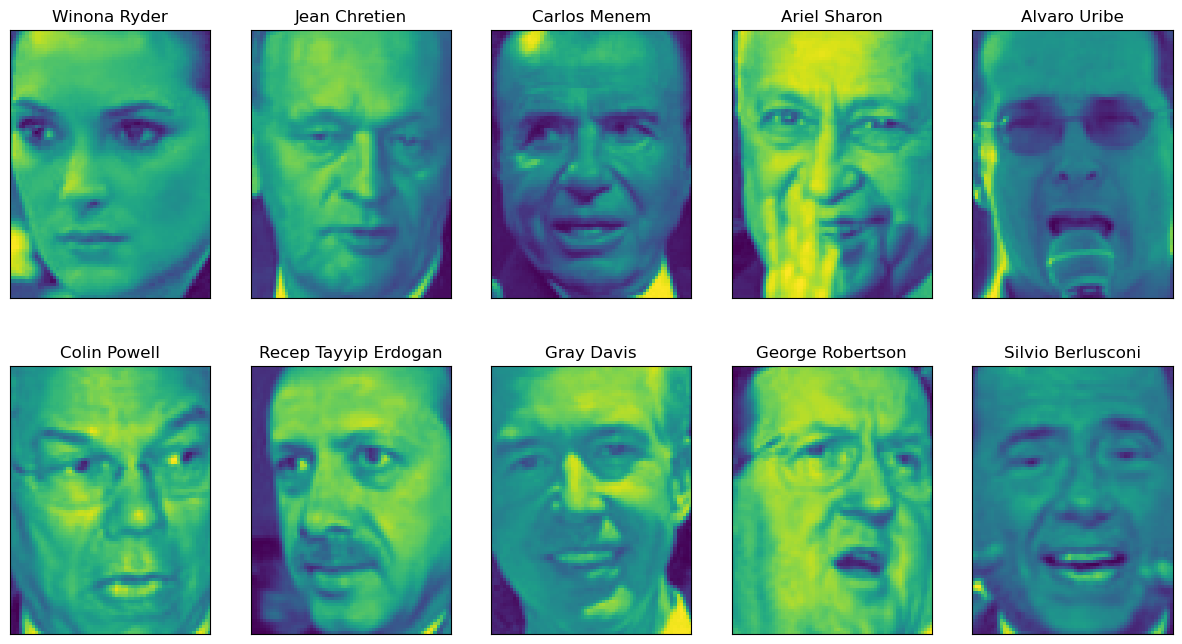

In [61]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [62]:
print(f'people.images.shape: {people.images.shape}')
print(f'number of classes: {len(people.target_names)}')

people.images.shape: (3023, 87, 65)
number of classes: 62


In [67]:
counts = np.bincount(people.target)

for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print(f'{name:35} {count:3}', end='     ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo                     39     Alvaro Uribe                         35     Amelie Mauresmo                      21     
Andre Agassi                         36     Angelina Jolie                       20     Ariel Sharon                         77     
Arnold Schwarzenegger                42     Atal Bihari Vajpayee                 24     Bill Clinton                         29     
Carlos Menem                         21     Colin Powell                        236     David Beckham                        31     
Donald Rumsfeld                     121     George Robertson                     22     George W Bush                       530     
Gerhard Schroeder                   109     Gloria Macapagal Arroyo              44     Gray Davis                           26     
Guillermo Coria                      30     Hamid Karzai                         22     Hans Blix                            39     
Hugo Chavez                          71     Igor Ivanov              

In [75]:
mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][0:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

In [77]:
X_people = X_people / 255.

In [82]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0
)

In [83]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print(f'test set score of 1-nn: {knn.score(X_test, y_test):2f}')

test set score of 1-nn: 0.215116


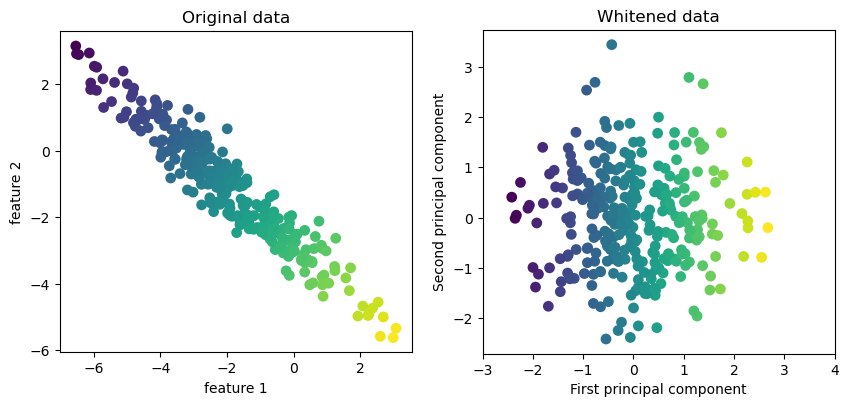

In [84]:
mglearn.plots.plot_pca_whitening()

In [85]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)

In [86]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [87]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)

knn.score(X_test_pca, y_test)

0.29651162790697677

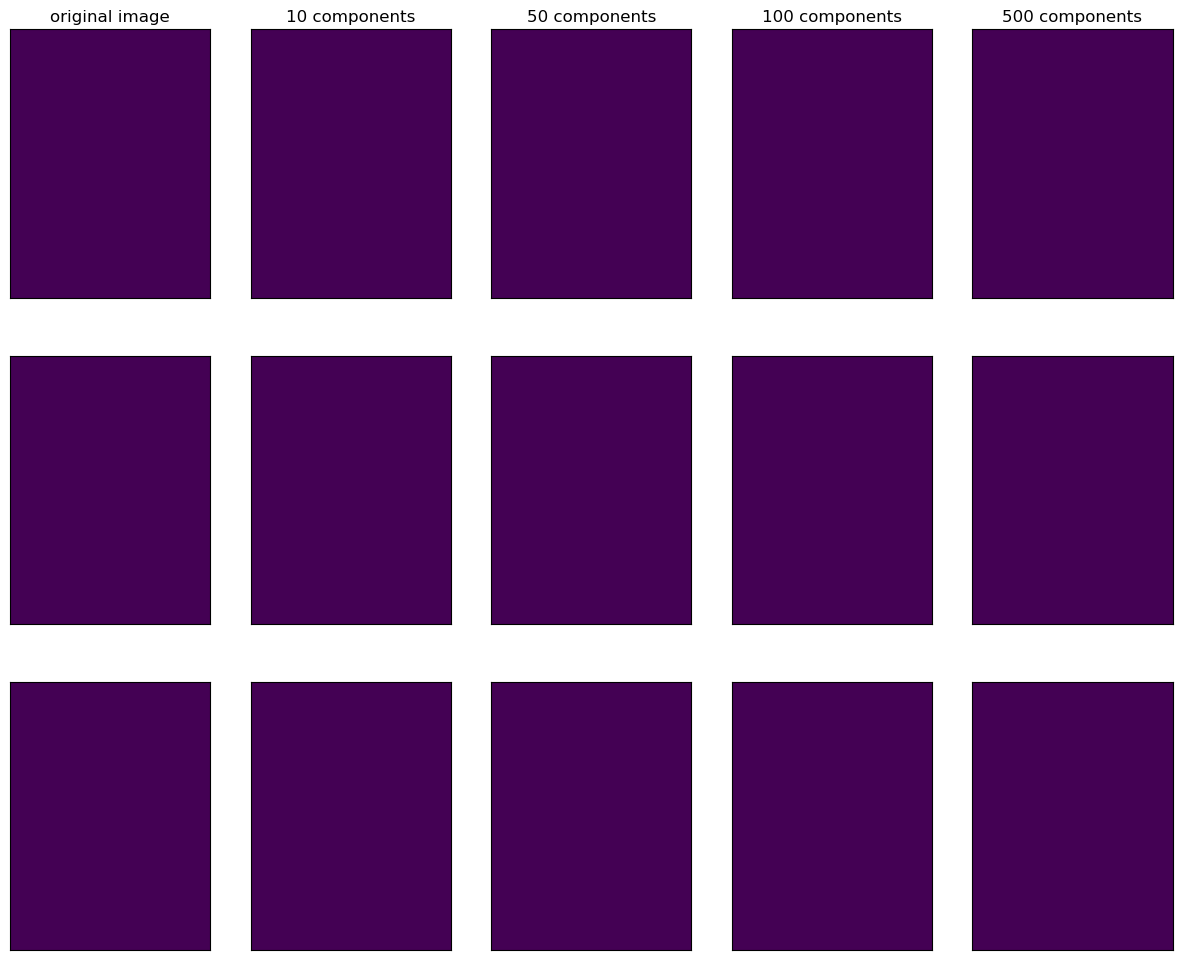

In [88]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

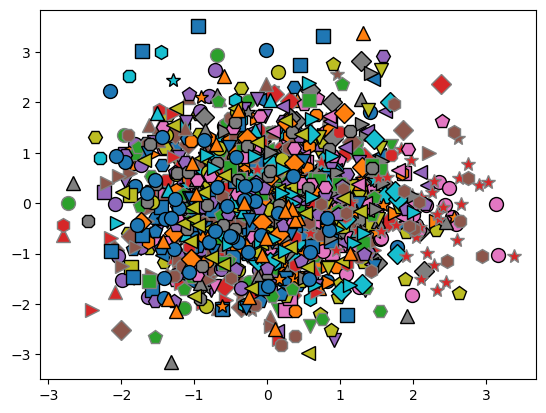

In [89]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)

### Non-Negative Matrix Factorization (NMF)

/opt/homebrew/anaconda3/envs/mlintro/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


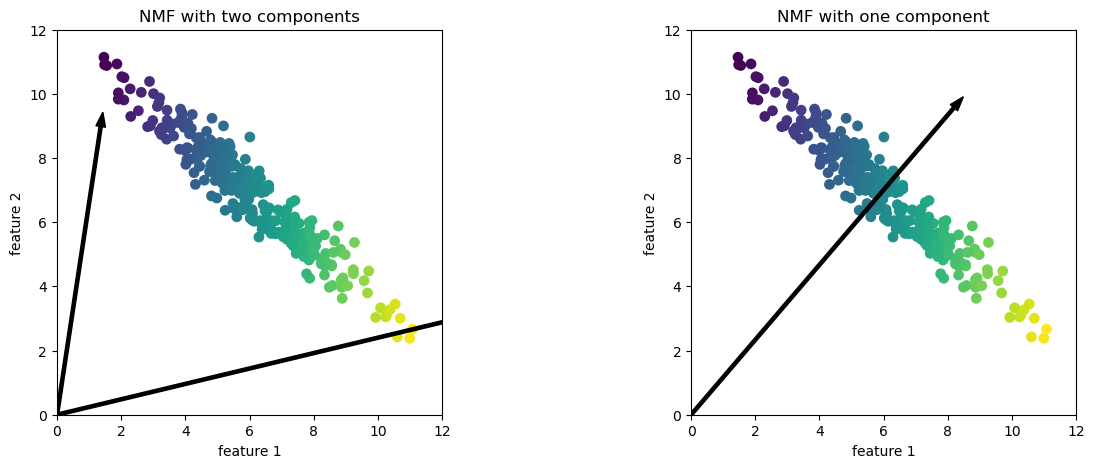

In [90]:
mglearn.plots.plot_nmf_illustration()

In [92]:
image_shape

(87, 65)

/opt/homebrew/anaconda3/envs/mlintro/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/anaconda3/envs/mlintro/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/anaconda3/envs/mlintro/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/anaconda3/envs/mlintro/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/anaconda3/envs/mlintro/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum nu

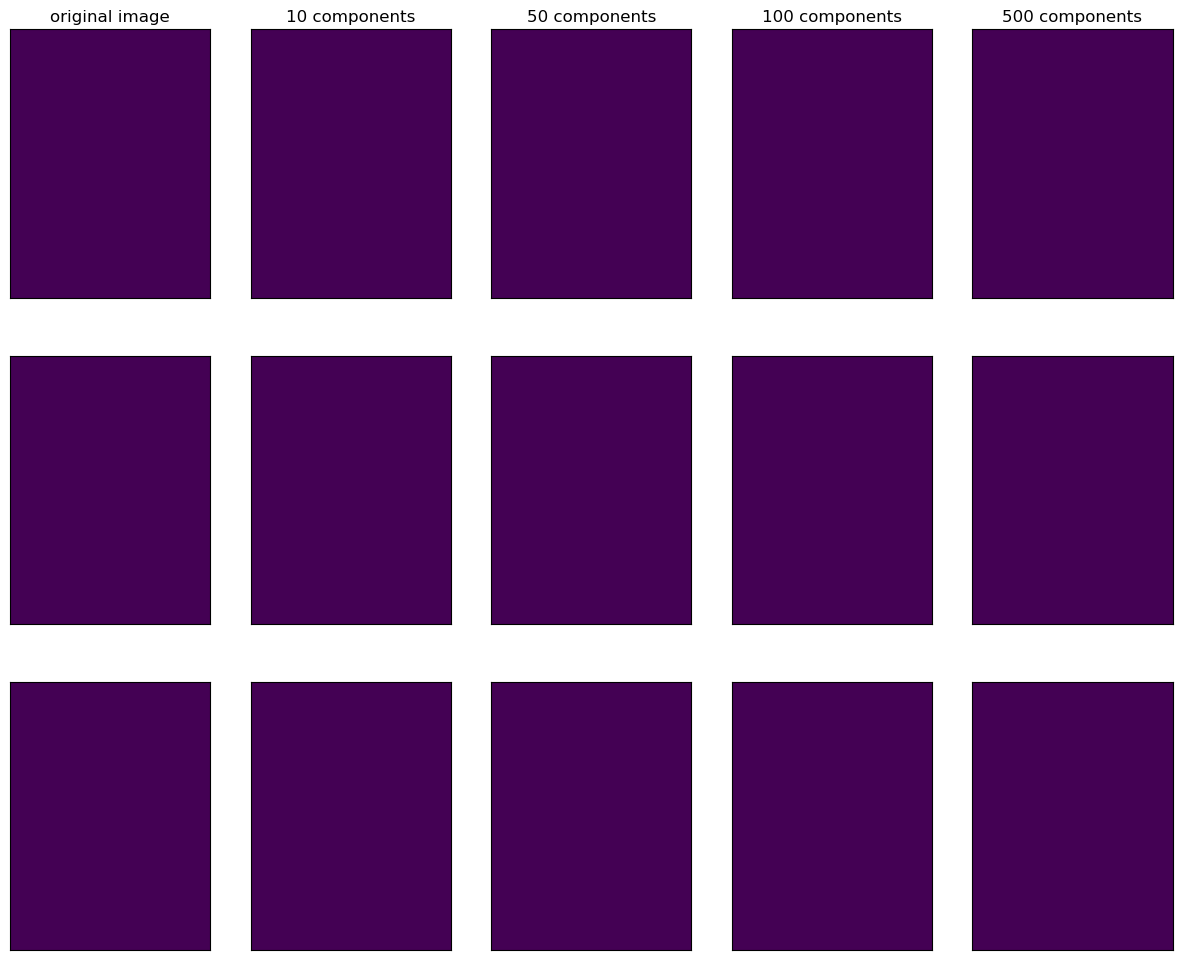

In [91]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

In [ ]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)

X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title(f'{i}. component')

## K-Means Clustering

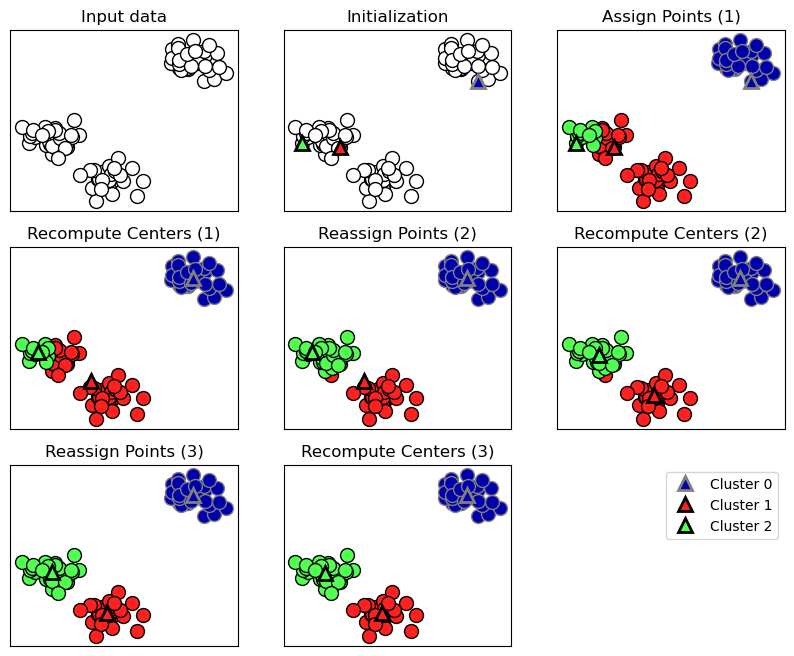

In [93]:
mglearn.plots.plot_kmeans_algorithm()

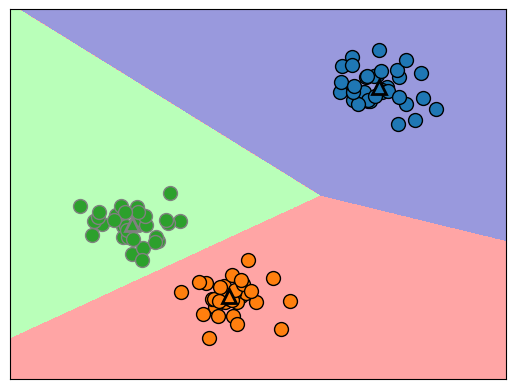

In [94]:
mglearn.plots.plot_kmeans_boundaries()

In [95]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [96]:
X, y = make_blobs(random_state=1)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

/opt/homebrew/anaconda3/envs/mlintro/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [98]:
kmeans.labels_


array([0, 2, 2, 2, 1, 1, 1, 2, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 2, 2, 1, 2,
       1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2,
       2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1,
       0, 1, 0, 2, 2, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0], dtype=int32)

In [99]:
kmeans.predict(X)

array([0, 2, 2, 2, 1, 1, 1, 2, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 2, 2, 1, 2,
       1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2,
       2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1,
       0, 1, 0, 2, 2, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0], dtype=int32)

In [100]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)

In [101]:
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)

In [102]:
clusters

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


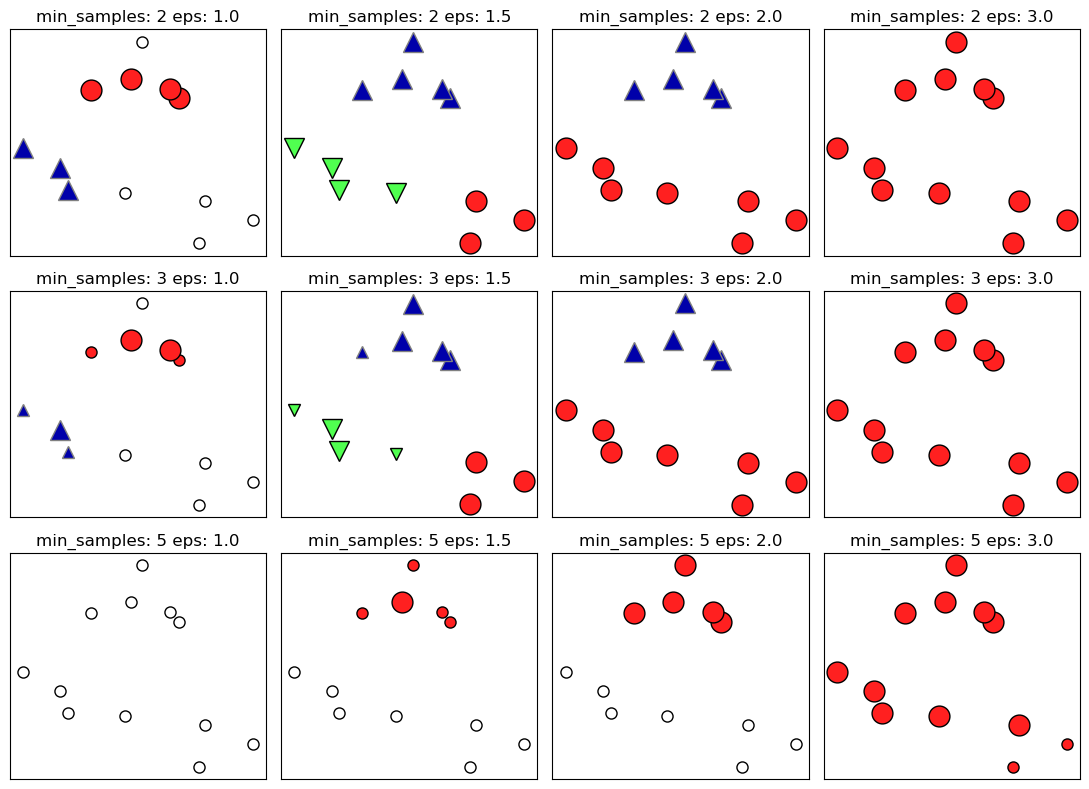

In [103]:
mglearn.plots.plot_dbscan()

In [105]:
from sklearn.datasets import make_moons

In [106]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

In [107]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [108]:
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

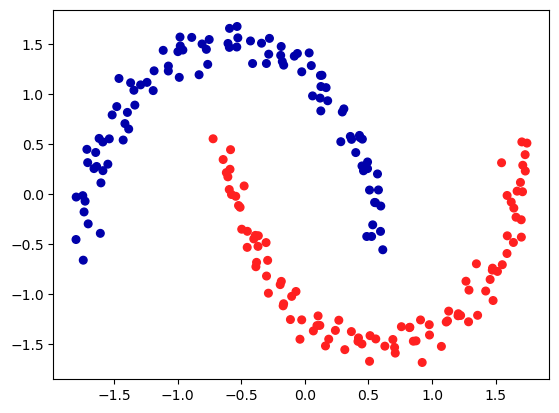

In [109]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=30)

## Evaluating Clustering Algorithms

In [110]:
from sklearn.metrics.cluster import adjusted_rand_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

In [112]:
from sklearn.cluster import AgglomerativeClustering

In [111]:
# scale data
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [113]:
algorithms = [KMeans(n_clusters=2),
              AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

In [114]:
random_state = np.random.RandomState(seed=2)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

In [115]:
random_state

RandomState(MT19937) at 0x17E788140

In [117]:
rng = np.random.default_rng(seed=1)
random_clusters = rng.integers(low=0, high=2, size=len(X))

/opt/homebrew/anaconda3/envs/mlintro/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


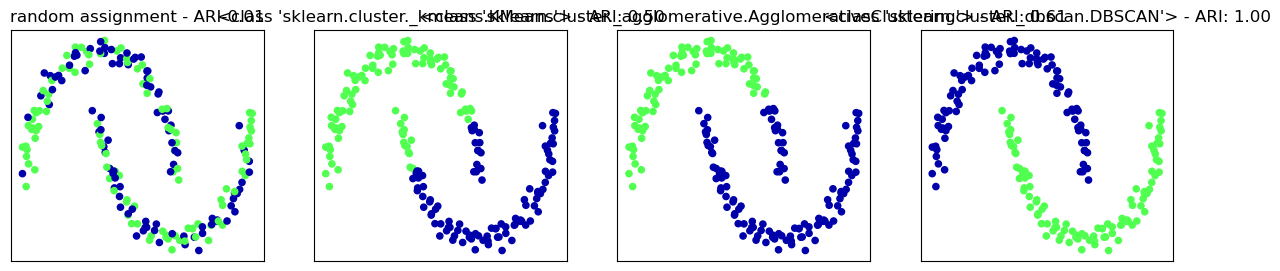

In [129]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c= random_clusters,
                cmap=mglearn.cm3, s=20)
axes[0].set_title(f'random assignment - ARI{adjusted_rand_score(y, random_clusters):.2f}')

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
               cmap=mglearn.cm3, s=20)
    ax.set_title(f'{algorithm.__class__} - ARI: {adjusted_rand_score(y, clusters):.2f}')

In [130]:
from sklearn.metrics import accuracy_score

clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]

print(f'accurarcy score: {accuracy_score(clusters1, clusters2)}')
print(f'ARI - {adjusted_rand_score(clusters1, clusters2)}')

accurarcy score: 0.0
ARI - 1.0
